In [2]:
import numpy as np
import scipy.io.wavfile as wav

import matplotlib
# matplotlib.use('GTKAgg')
import matplotlib.pyplot as plt
%matplotlib inline

import librosa, librosa.display

import time, operator
# import pylab as pl
from IPython import display

from io import BytesIO
from PIL import Image

import torch
import torchvision.models as models
import torch.nn as nn
from torch.autograd import Variable
import torchvision.transforms as transforms
import torch.nn.functional as F
import torchvision.datasets as dset

from deepdream import util as ddutil
from deepdream import resnet as ddresnet
from deepdream.deepdream import dream

from pytorch_utilities.presentation import stream_spectrogram, classify_sound

import sys, inspect
sys.path.append("/audio")
import torchaudio

import IPython.display as ipd

ModuleNotFoundError: No module named 'torchaudio'

In [ ]:
def generate_spectrogram(sound_in):
    
    sound_tensor, sr = torchaudio.load(sound_in)
    y = sound_tensor.numpy()[:,0]
    #n_mels = 128*3 # perhaps twice as long as 128
    #fmax = 10000

    S = librosa.feature.melspectrogram(y=y, sr=sr)
    plt.figure(dpi=100)
    librosa.display.specshow(librosa.power_to_db(S,ref=np.max))
    
    plt.axis('off') # Removes black border
    plt.tight_layout()
    plt.show()
    del S,y,sr,sound_tensor

# Project: Sound-to-Image using transfer learning

- By: Thom Miano
- Computational Visual Recognition
- December 05, 2017

<b>High-level problem:</b> How can we creatively generate images based on sound inputs from our enviroment, and how do we make this interactive?

<b>Machine learning problem:</b> Can you use a Convolutional Neural Network (CNN), like ResNet-50, that's trained on data from a <i>different modality</i> (i.e., images) to fine-tune a reliable enivornmental sound classifier?

### Goal: Create images of sounds, train a CNN, creatively generate corresponding images, and give user control.

# Background - Sound examples

![data-dist](./manuscript/figures/class_histogrograms-01.png)

# What are digital sounds?

Sample rate is the number of samples of audio carried per second, measured in Hz or kHz (one kHz being 1 000 Hz). For example, 44 100 samples per second can be expressed as either 44 100 Hz, or 44.1 kHz. Bandwidth is the difference between the highest and lowest frequencies carried in an audio stream.

In [64]:
ex_sound_in = "/data/datasets/sound_datasets/pytorch_UrbanSound8K/audio/trainset/children_playing/60935-2-0-9.wav"
sound_tensor, sr = torchaudio.load(ex_sound_in)
y = sound_tensor.numpy()[:,0]

In [79]:
sound_tensor


-2.1671e+07 -5.1709e+06
-1.9522e+07 -5.4300e+06
-2.0221e+07 -7.2904e+06
           ⋮            
 1.5947e+07  5.3053e+06
 2.1581e+07  3.2509e+06
 2.2848e+07  3.4970e+05
[torch.FloatTensor of size 192000x2]

In [80]:
sr

48000

In [82]:
plt.plot(sound_tensor.numpy())

### Children playing

In [1]:
children_path = "/data/datasets/sound_datasets/pytorch_UrbanSound8K/audio/trainset/children_playing/60935-2-0-9.wav"
ipd.Audio(children_path)

NameError: name 'ipd' is not defined

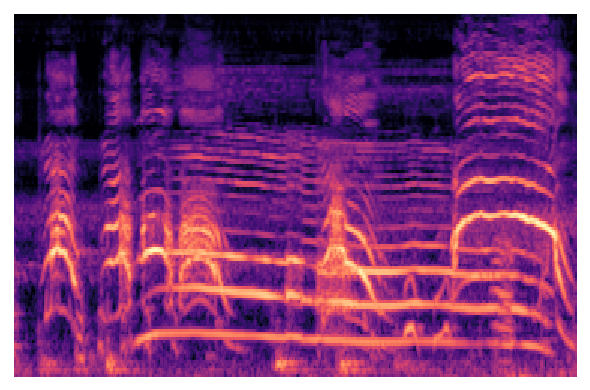

In [31]:
sr=44100

generate_spectrogram(children_path)

### Street music

In [32]:
street_path = "/data/datasets/sound_datasets/pytorch_UrbanSound8K/audio/trainset/street_music/108041-9-0-5.wav"
ipd.Audio(street_path)

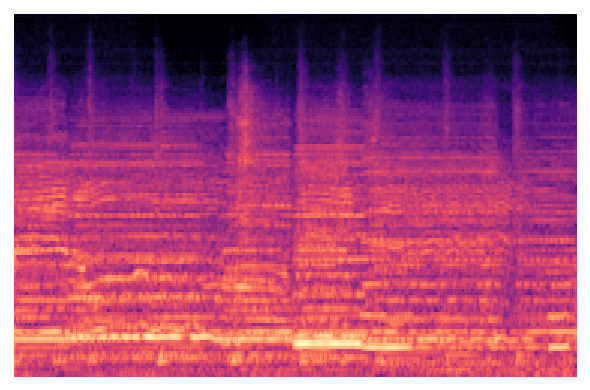

In [33]:
sr=44100

generate_spectrogram(street_path)

### Drilling

In [38]:
drill_path = "/data/datasets/sound_datasets/pytorch_UrbanSound8K/audio/trainset/drilling/151005-4-2-1.wav"
ipd.Audio(drill_path)

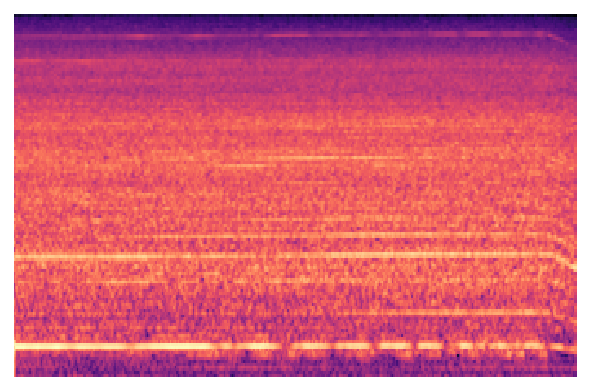

In [39]:
sr=44100

generate_spectrogram(drill_path)

# What does the average image look like for the training set?

![avg](./manuscript/figures/img_averages.png)

# Training

1. Creating training, validation, and testing dataset using <b>80%, 10%, and 10%</b> and holding class distributions.
2. Rescaled spectrograms  from <b>440x600</b> to <b>224x224</b>.
3. Several models ranging Epochs up to 100.
4. Current model is batch size <b>16, 15 epochs, learning rate of 0.001, momentum of 0.9, weight decay of 0.0005, Stochastic Gradient Descent (SGD) optimizer</b>.

![data](./manuscript/figures/example_scaled_spectrograms.png)

# Classification results

![cm](./manuscript/figures/testset_cm.png)

![](./manuscript/figures/training_accuracy.png)

![loss](./manuscript/figures/training_loss.png)